# **WEEK 3**

**UNIVARIATE VISUAL ANALYSIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Cleaned_Dataset.csv')
sns.set(style="whitegrid")


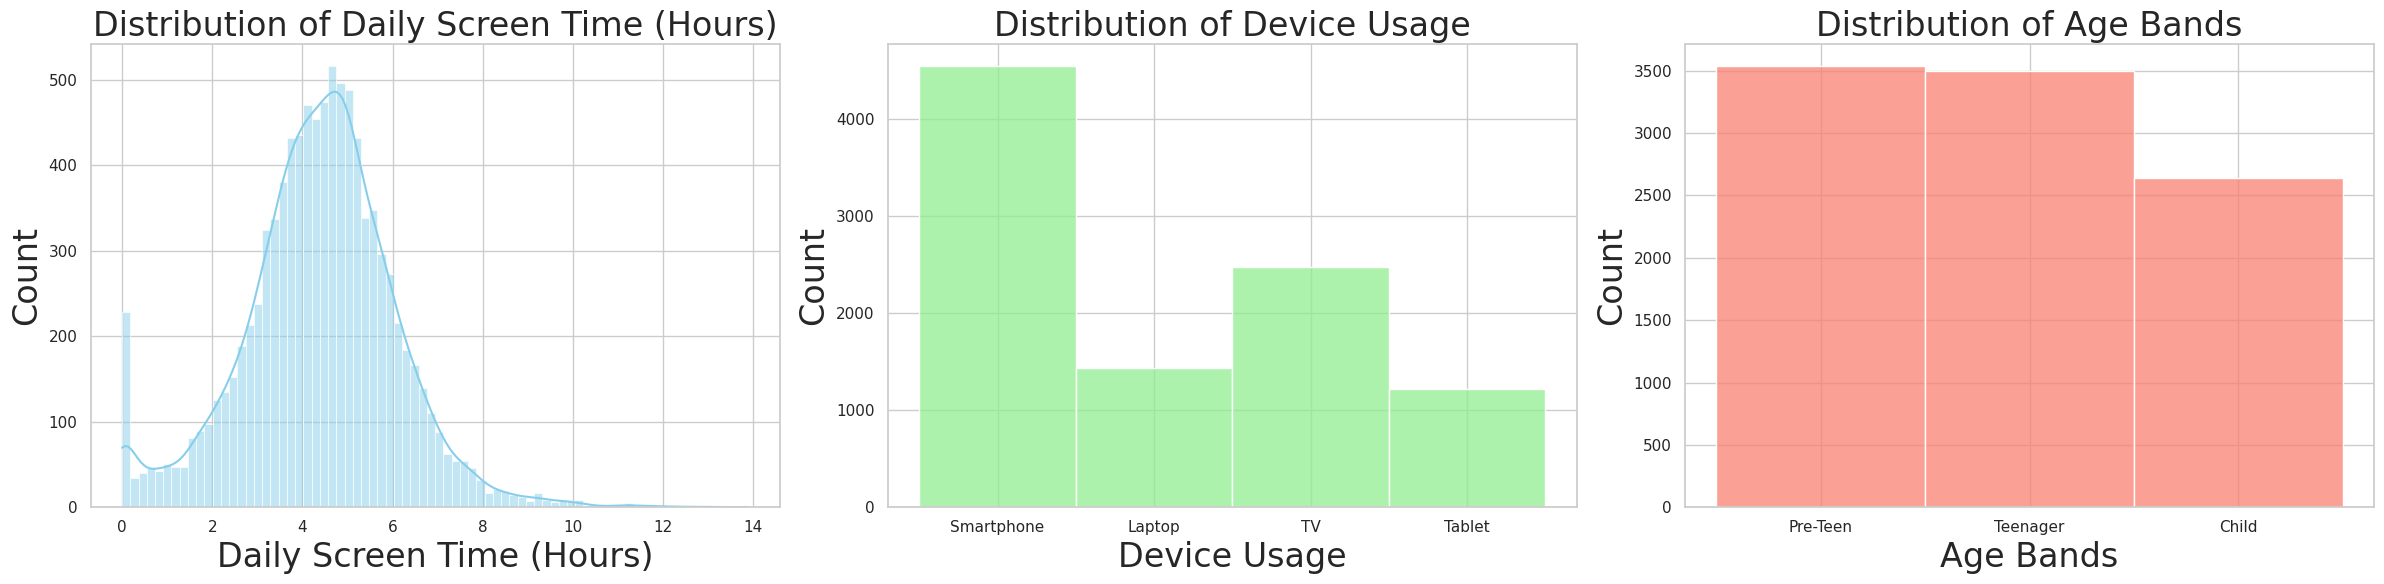

In [ ]:
# Histogram for univariate analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')
]
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if i == 0:
        sns.histplot(data[column], kde=True, ax=axes[i], color='skyblue')
    elif i == 1:
        sns.histplot(data[column], kde=False, ax=axes[i], color='lightgreen')
    else:
        sns.histplot(data[column], kde=False, ax=axes[i], color='salmon')
    axes[i].set_title(f"Distribution of {xlabel}",fontsize=24)
    axes[i].set_xlabel(xlabel,fontsize=24)
    axes[i].set_ylabel("Count",fontsize=24)

plt.tight_layout()
plt.show()

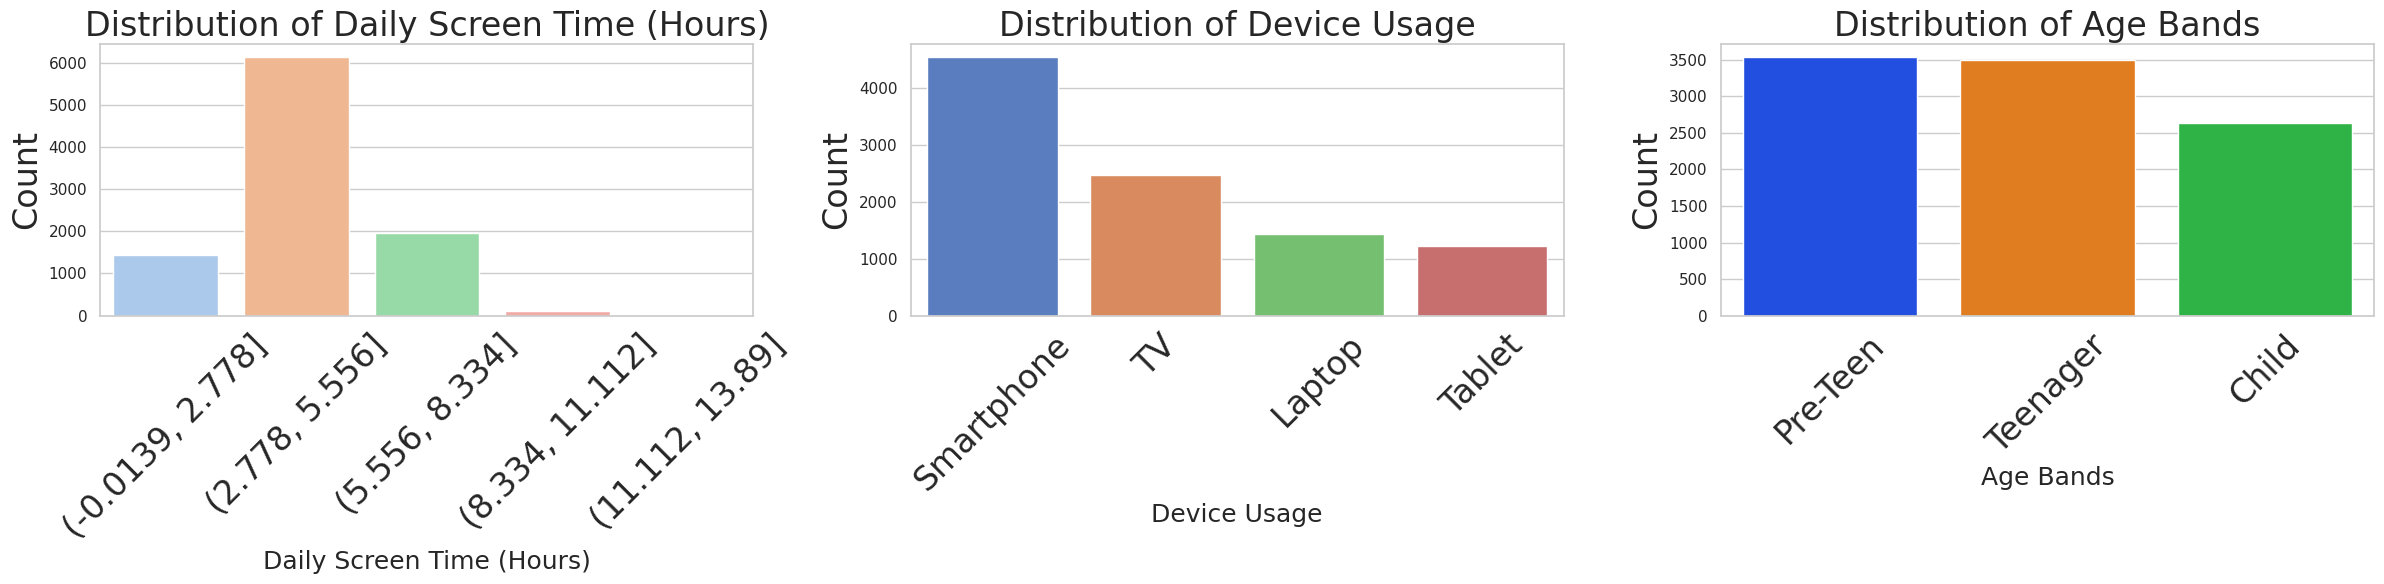

In [ ]:
# Bar chart for Univariate Analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')]
fig, axes = plt.subplots(1, 3, figsize=(24,6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if column == 'Avg_Daily_Screen_Time_hr':
        bins = pd.cut(data[column], bins=5)
        value_counts = bins.value_counts().sort_index()
        sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[i], hue=value_counts.index.astype(str), palette='pastel', legend=False)
        axes[i].tick_params(axis='x', rotation=45,labelsize=24)
    else:
        value_counts = data[column].value_counts()
        if column == 'Primary_Device':
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index, palette='muted', legend=False)
        else:
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index, palette='bright', legend=False)
        axes[i].tick_params(axis='x', rotation=45,labelsize=24)

    axes[i].set_title(f"Distribution of {xlabel}",fontsize=24)
    axes[i].set_xlabel(xlabel,fontsize=18)
    axes[i].set_ylabel("Count",fontsize=24)

plt.tight_layout()
plt.show()

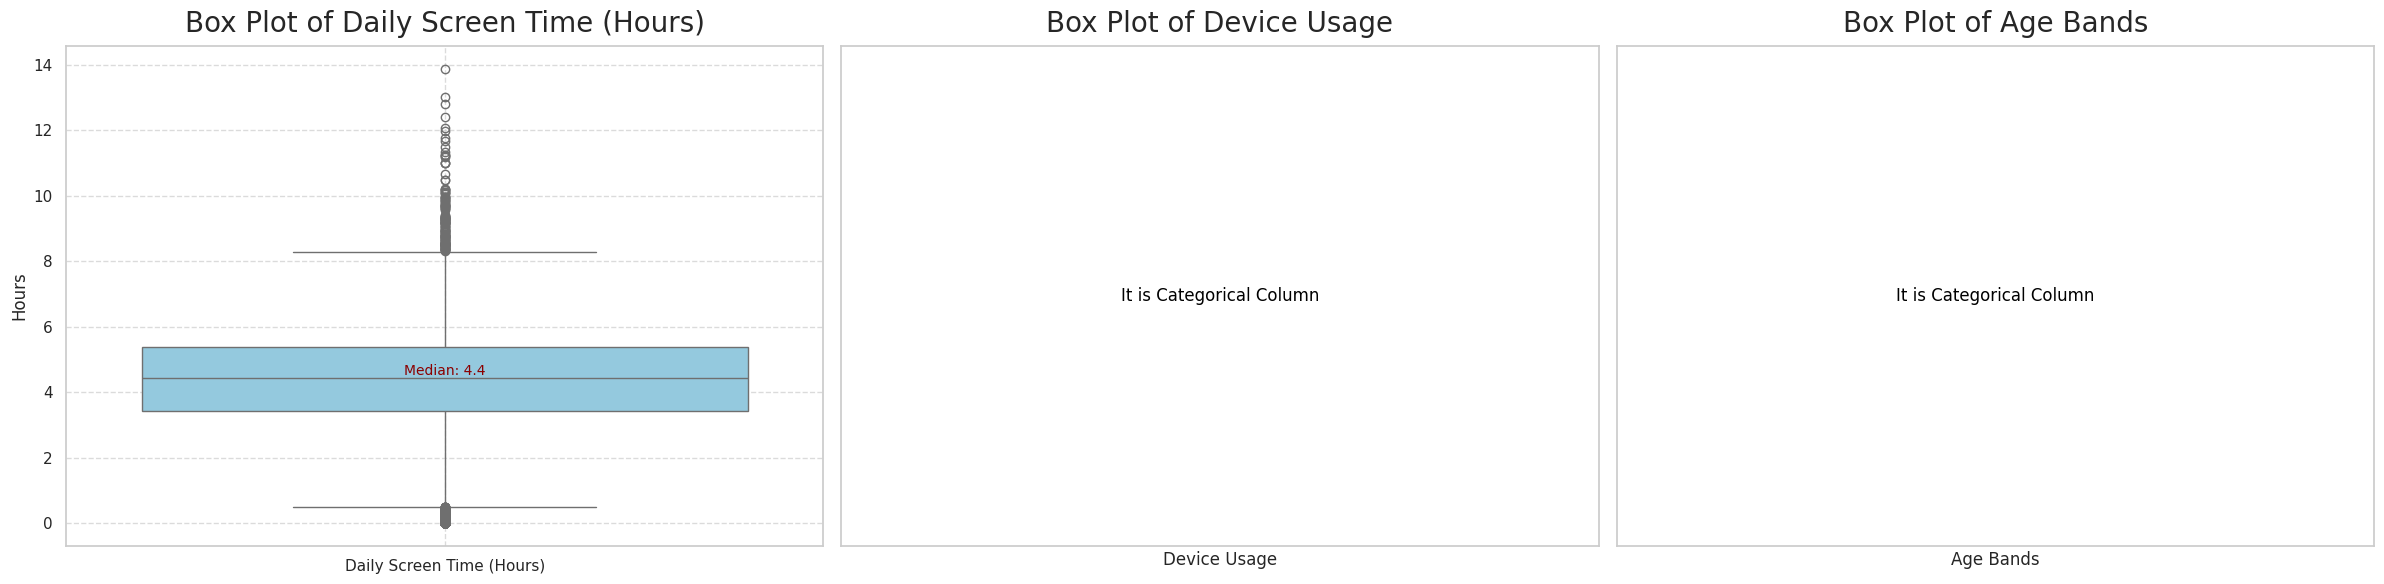

In [ ]:
# Box plot for Univariate Analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')]
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if column == 'Avg_Daily_Screen_Time_hr':
        # Box plot for numerical data
        sns.boxplot(y=data[column], ax=axes[i], color='skyblue')
        axes[i].set_ylabel("Hours")
        axes[i].set_xticks([0])
        axes[i].set_xticklabels([xlabel])
        median = data[column].median()
        axes[i].text(0, median, f'Median: {median:.1f}', horizontalalignment='center',
                     verticalalignment='bottom', fontsize=10, color='darkred')
    else:
        # Display text for categorical columns
        axes[i].text(0.5, 0.5, "It is Categorical Column",
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=12, color='black', transform=axes[i].transAxes)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_xlabel(xlabel)

    axes[i].set_title(f"Box Plot of {xlabel}", fontsize=20, pad=10)
    axes[i].grid(True, linestyle='--', alpha=0.7) if column == 'Avg_Daily_Screen_Time_hr' else None

plt.tight_layout()
plt.show()

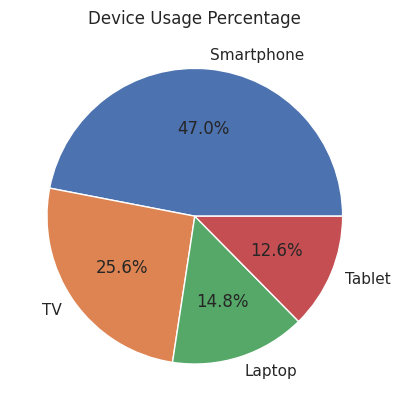

In [ ]:
# Pie chart for Device Usuage
data['Primary_Device'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', ylabel=''
)
plt.title("Device Usage Percentage")
plt.show()


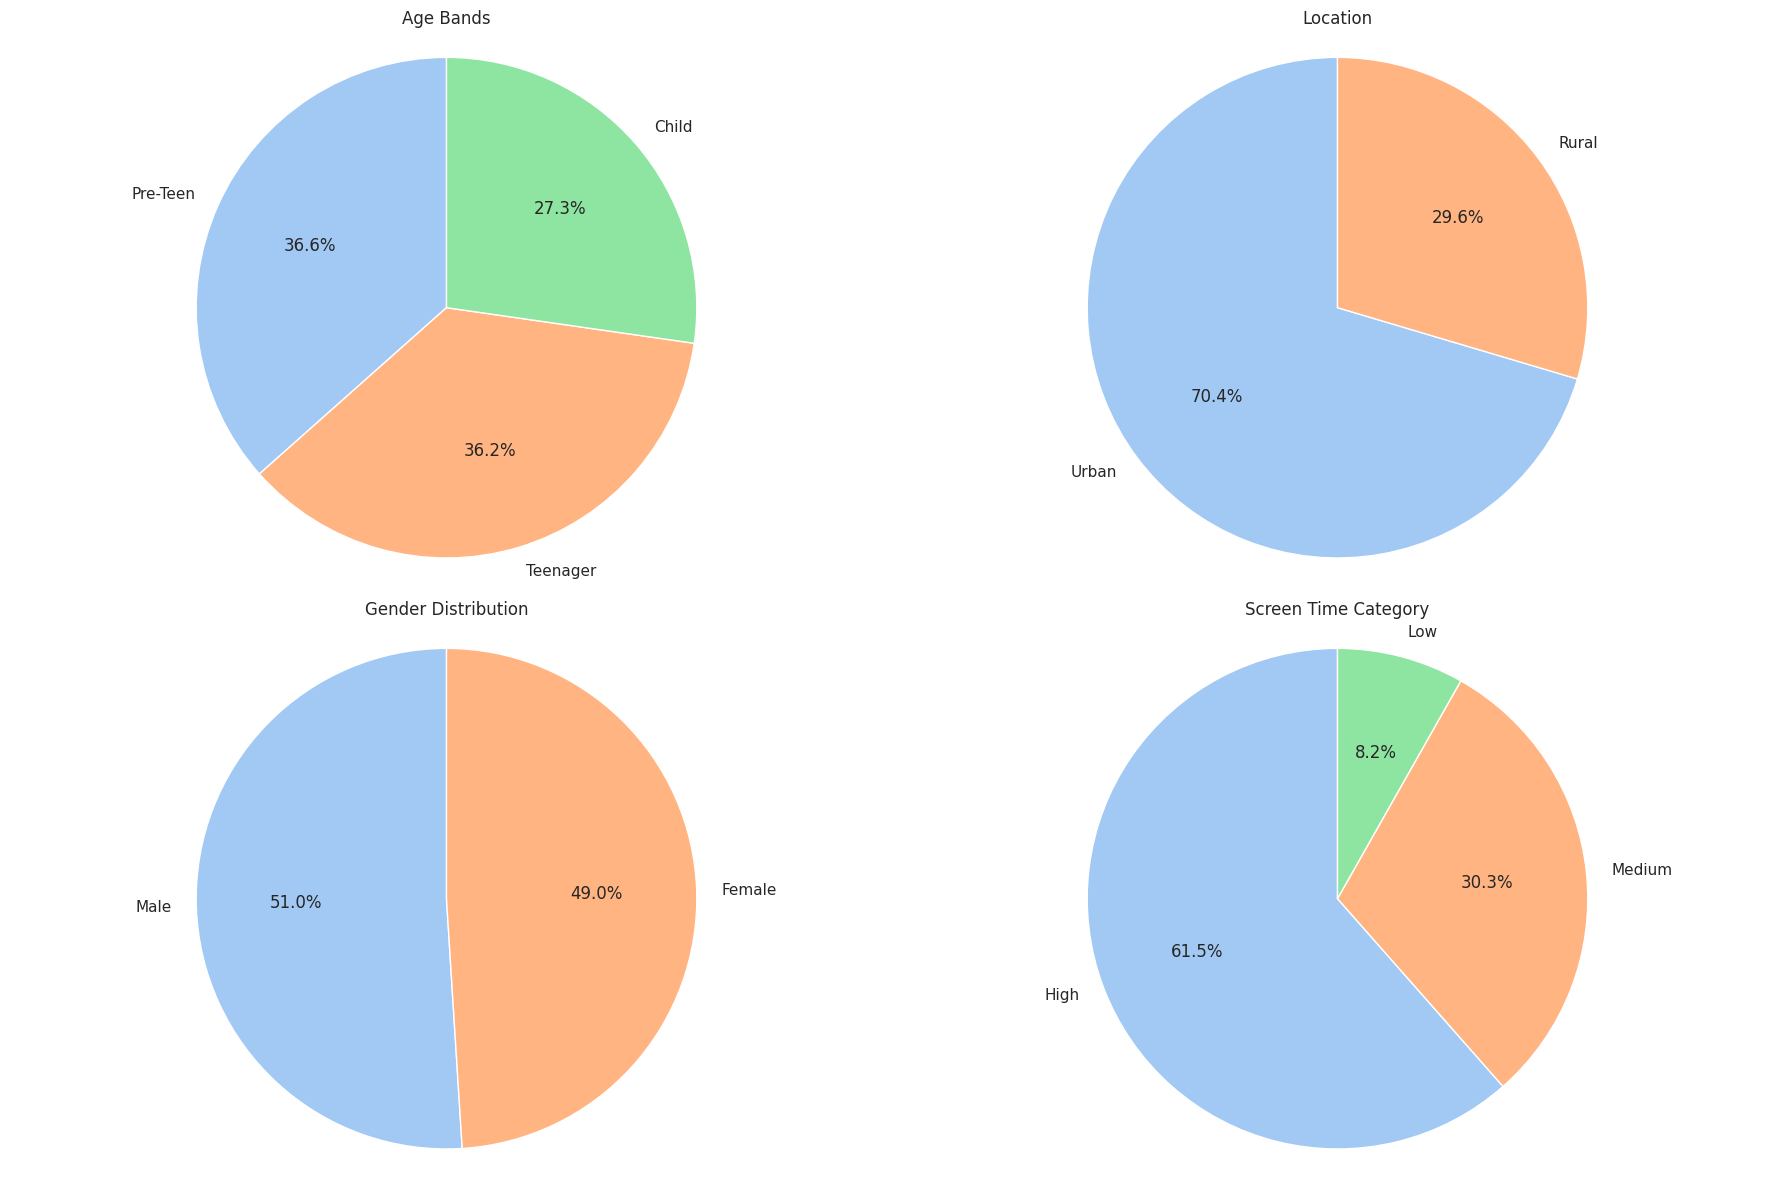

In [ ]:
# Categorical columns to analyze with pie charts
columns_to_plot = [
    ('Age_Band', 'Age Bands'),
    ('Urban_or_Rural', 'Location'),
    ('Gender', 'Gender Distribution'),
    ('Screen_Time_Category', 'Screen Time Category')]
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
for i, (column, title) in enumerate(columns_to_plot):
    value_counts = data[column].value_counts()
    percentages = (value_counts / value_counts.sum() * 100).round(1)
    axes[i].pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(title)
    axes[i].axis('equal')
axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Interpretation**

Median of Average Screen time is 4.4 hours.

Pre-Teen and Teenagers are used more than children.

Mostly Smart phones are used by the users.

**BIVARIATE VISUAL ANALYSIS**

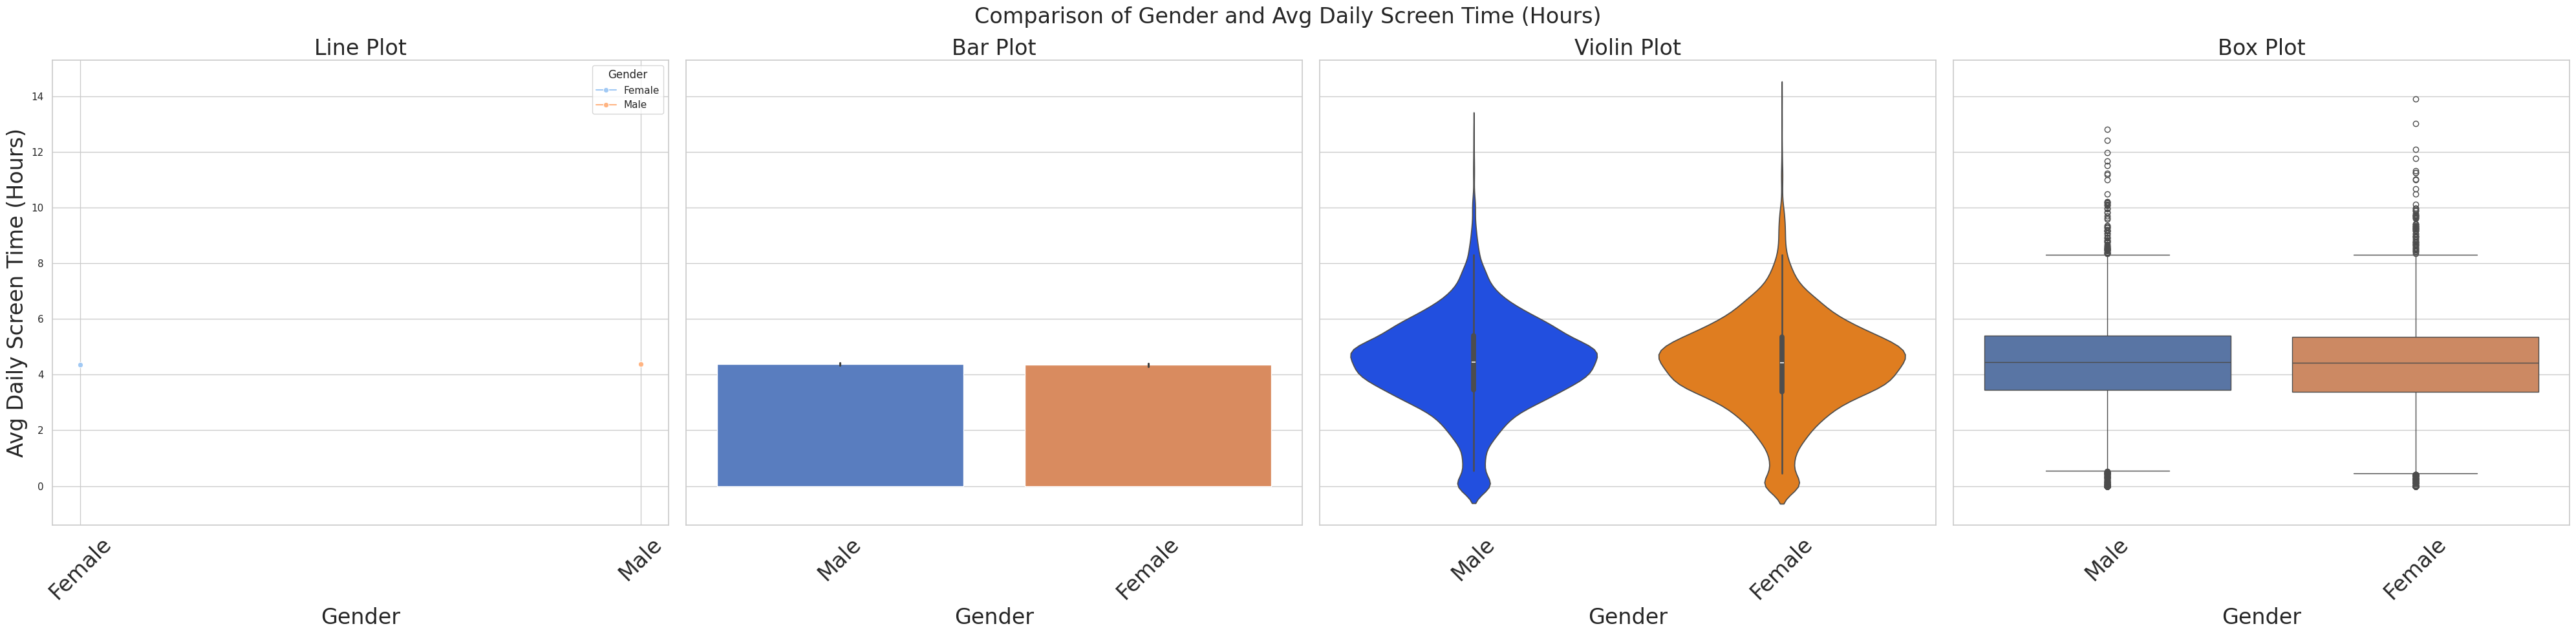

In [ ]:
# Comparing Avg Screen time and Gender
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line', 'Line Plot'),
    ('bar', 'Bar Plot'),
    ('violin', 'Violin Plot'),
    ('box', 'Box Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='deep')
    elif plot_type == 'violin':
        sns.violinplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='bright')
    elif plot_type == 'bar':
        sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='muted')
    elif plot_type == 'line':
        means = data.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Gender', palette='pastel', marker='o')
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Gender',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Gender and Avg Daily Screen Time (Hours)', fontsize=24)
plt.tight_layout()
plt.show()

**Interpretation**

It show the spread and density of screen times.

It suggests both genders have similar screen habits,Females may used high screen time.

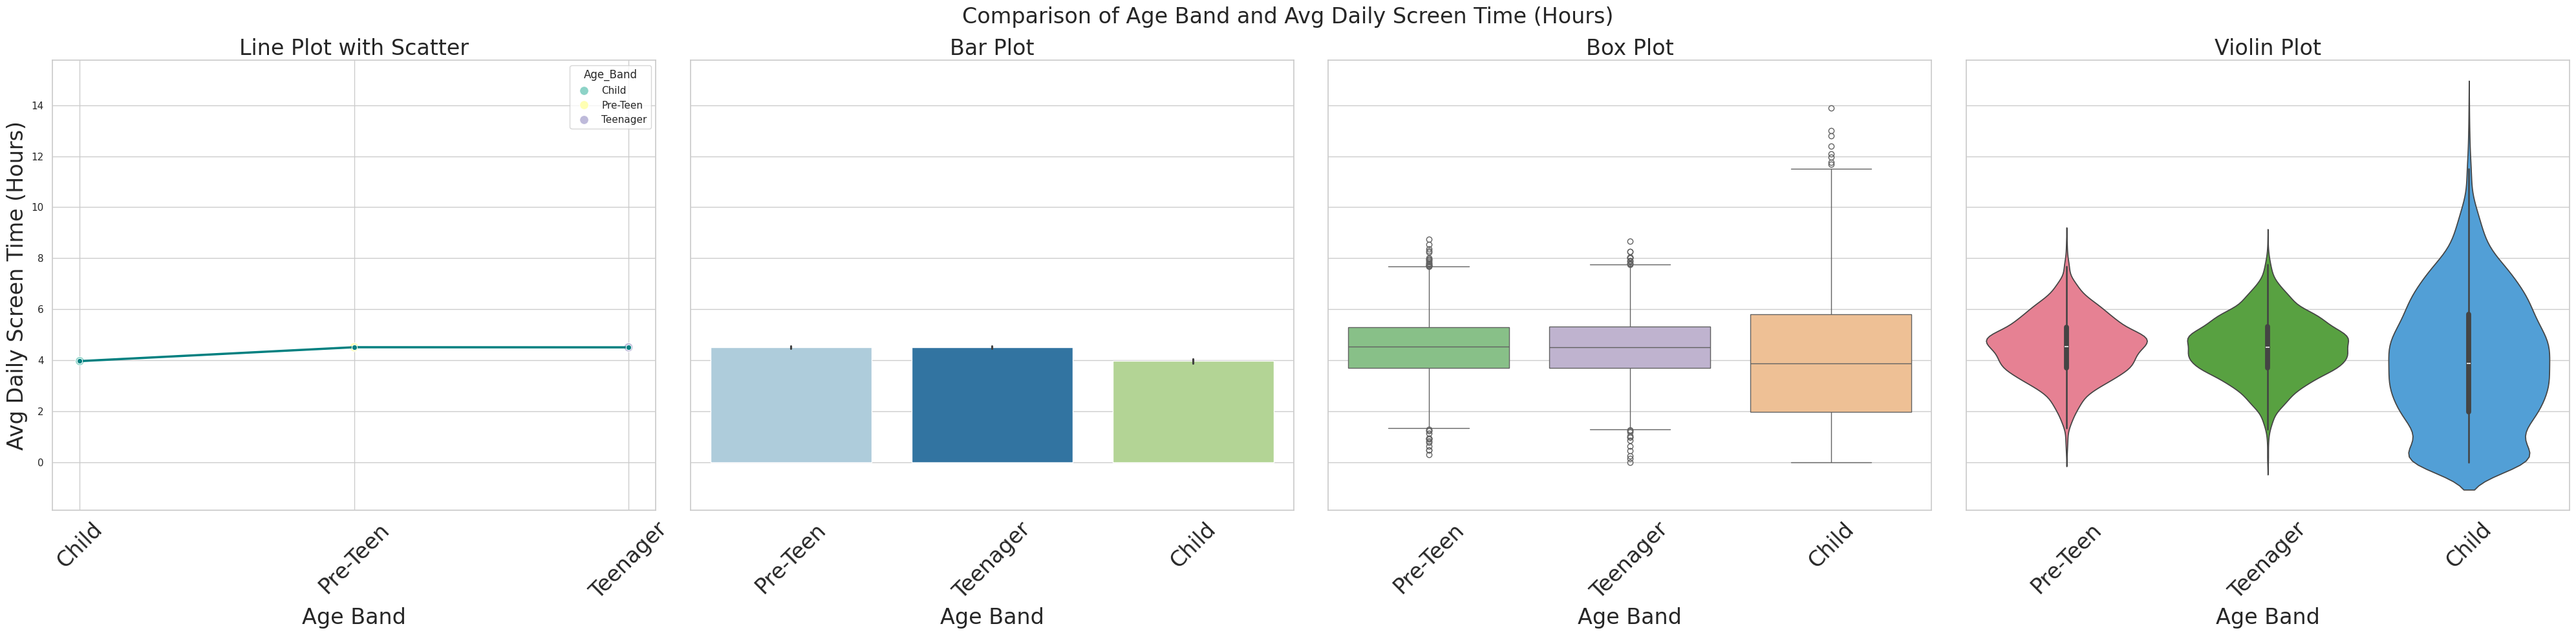

In [ ]:
# Comparing Avg Screen time and Age_Band
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line_scatter', 'Line Plot with Scatter'),
    ('bar', 'Bar Plot'),
    ('box', 'Box Plot'),
    ('violin', 'Violin Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='Accent', legend=False)
    elif plot_type == 'violin':
        sns.violinplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='husl', legend=False)
    elif plot_type == 'bar':
        sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='Paired', legend=False)
    elif plot_type == 'line_scatter':
        means = data.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], color='teal', linewidth=2.5, marker='o')
        sns.scatterplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Age_Band', palette='Set3', s=100)
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Age Band',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Age Band and Avg Daily Screen Time (Hours)', fontsize=24)
plt.tight_layout()
plt.show()

**Interpretation**

With more outliers in older groups,teens not only has average more but also have extreme high users.

This suggests older kids spend more time on screens, possibly due to schoolwork or social media.

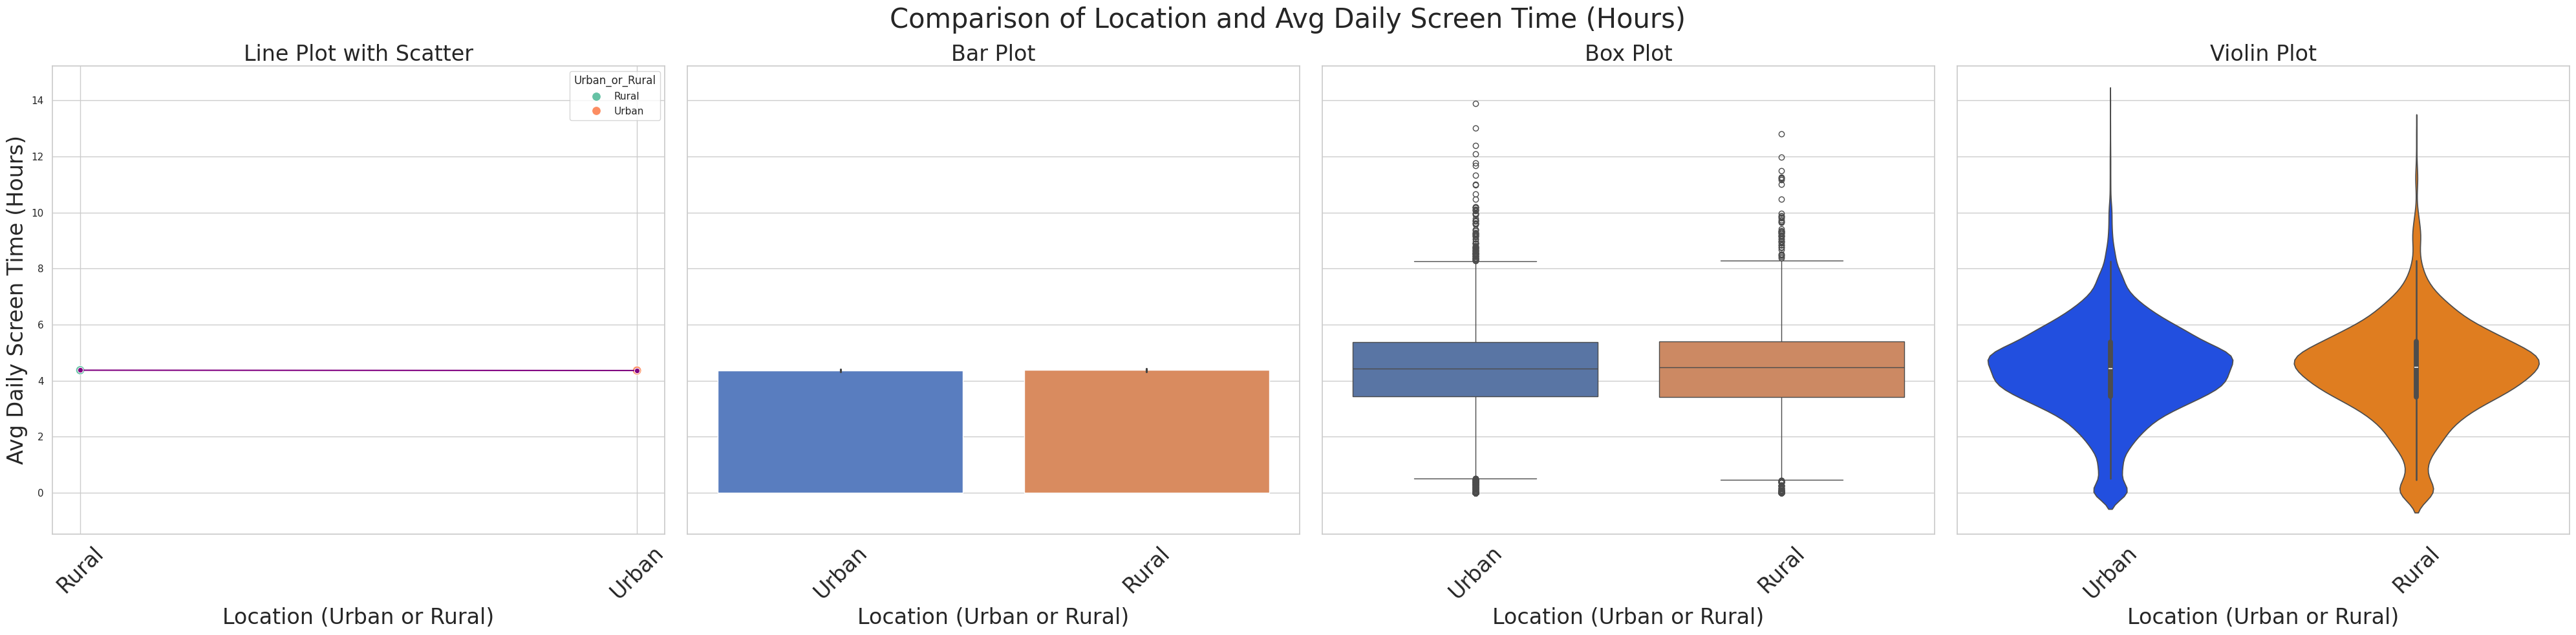

In [ ]:
# Comparing Avg Screen time and Location (Rural or Urban)
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line_scatter', 'Line Plot with Scatter'),
    ('bar', 'Bar Plot'),
    ('box', 'Box Plot'),
    ('violin', 'Violin Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='deep', legend=False)
    elif plot_type == 'violin':
        sns.violinplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='bright', legend=False)
    elif plot_type == 'bar':
        sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='muted', legend=False)
    elif plot_type == 'line_scatter':
        means = data.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], color='purple', marker='o')
        sns.scatterplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Urban_or_Rural', palette='Set2', s=100)
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Location (Urban or Rural)',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Location and Avg Daily Screen Time (Hours)', fontsize=30)
plt.tight_layout()
plt.show()

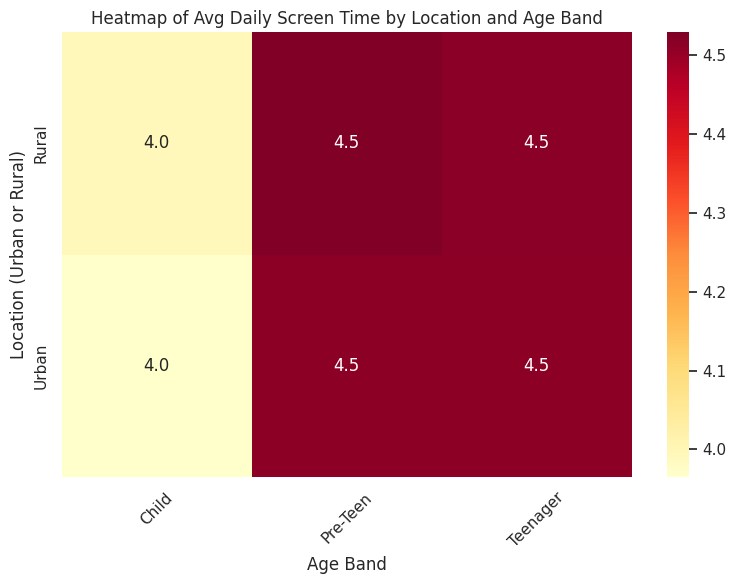

In [ ]:
# heatmap for Comparing Avg Screen Time and Location
pivot_table = data.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Urban_or_Rural',
                              columns='Age_Band', aggfunc='mean', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap of Avg Daily Screen Time by Location and Age Band')
plt.xlabel('Age Band')
plt.ylabel('Location (Urban or Rural)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**

The boxes show similar medians, but Urban might have more outliers.

This suggests urban areas have a wider range of screen habits.

# **WEEK 4**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
# Load the dataset
df = pd.read_csv('Cleaned_Dataset.csv')

In [ ]:
# Data cleaning: Remove extra quotes from Screen_Size if present
df['Screen_Size'] = df['Screen_Size'].str.replace('"', '')

print(df['Primary_Device'].value_counts())
print(df['Age_Band'].value_counts())
print(df['Gender'].value_counts())
print(df['Urban_or_Rural'].value_counts())

Primary_Device
Smartphone    4540
TV            2478
Laptop        1431
Tablet        1219
Name: count, dtype: int64
Age_Band
Pre-Teen    3535
Teenager    3495
Child       2638
Name: count, dtype: int64
Gender
Male      4928
Female    4740
Name: count, dtype: int64
Urban_or_Rural
Urban    6810
Rural    2858
Name: count, dtype: int64


In [ ]:
# Average screen time by demographics and device
avg_screen_time = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
print("Average Screen Time by Demographics and Device:\n", avg_screen_time.head(10))

# Average educational to recreational ratio by demographics and device
avg_ratio = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural', 'Primary_Device'])['Educational_to_Recreational_Ratio'].mean().reset_index()
print("Average Educational to Recreational Ratio by Demographics and Device:\n", avg_ratio.head(10))

# Peak usage groups: Highest average screen time by Age_Band, Gender, Urban_or_Rural
peak_groups = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural'])['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
print("Peak Usage Groups by Average Screen Time:\n", peak_groups.head(10))


Average Screen Time by Demographics and Device:
   Age_Band  Gender Urban_or_Rural Primary_Device  Avg_Daily_Screen_Time_hr
0    Child  Female          Rural     Smartphone                  3.943899
1    Child  Female          Rural             TV                  3.735533
2    Child  Female          Rural         Tablet                  4.103165
3    Child  Female          Urban     Smartphone                  3.835800
4    Child  Female          Urban             TV                  4.002278
5    Child  Female          Urban         Tablet                  3.831637
6    Child    Male          Rural     Smartphone                  3.882105
7    Child    Male          Rural             TV                  4.156452
8    Child    Male          Rural         Tablet                  4.290392
9    Child    Male          Urban     Smartphone                  4.225373
Average Educational to Recreational Ratio by Demographics and Device:
   Age_Band  Gender Urban_or_Rural Primary_Device  \
0  


**Observation:**

Peak usage often in 'High' screen time category for Pre-Teens and Teens using Smartphones in Urban areas.

Smartphones dominate across all demographics, especially for portable recreational use.

Urban users tend to have higher average screen time than Rural.

Lower educational ratios (more recreational) in younger age groups and males.

TV usage is higher among Children in Rural areas, with more physical health impacts.

Females report more anxiety-related issues in high screen time groups.

Tablets show balanced use but higher in recreational for Teens.

In [ ]:
# Set different color palettes for charts
device_colors = sns.color_palette('Set1', n_colors=len(df['Primary_Device'].unique()))
age_colors = sns.color_palette('Set2', n_colors=len(df['Age_Band'].unique()))
gender_colors = sns.color_palette('Pastel1', n_colors=2)
location_colors = sns.color_palette('Dark2', n_colors=2)

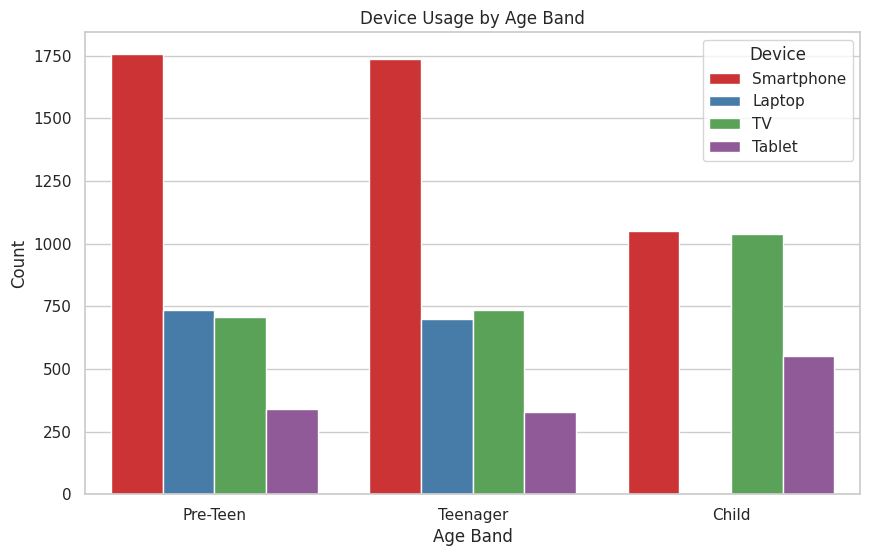

In [ ]:
#  Bar chart - Device usage count by Age Band
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Primary_Device', palette=device_colors)
plt.title('Device Usage by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

**Observation:**

Smartphones are the mostly used by  Teens and Pre-Teens among all the Devices.

Children show a preference for TVs compared to other age groups, while Laptops are more common among Teens.

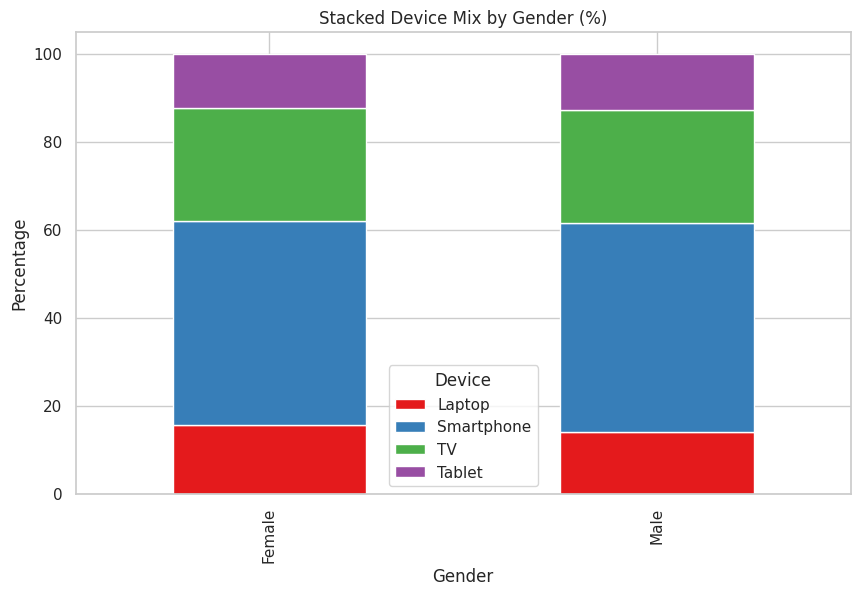

In [ ]:
#  Stacked bar chart - Device mix by Gender
device_gender = pd.crosstab(df['Gender'], df['Primary_Device'], normalize='index') * 100
device_gender.plot(kind='bar', stacked=True, figsize=(10,6), color=device_colors)
plt.title('Stacked Device Mix by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Device')
plt.show()

**Observation:**

Males use Laptops and TVs more frequently than females, who lean heavily toward portable devices for recreational purposes.

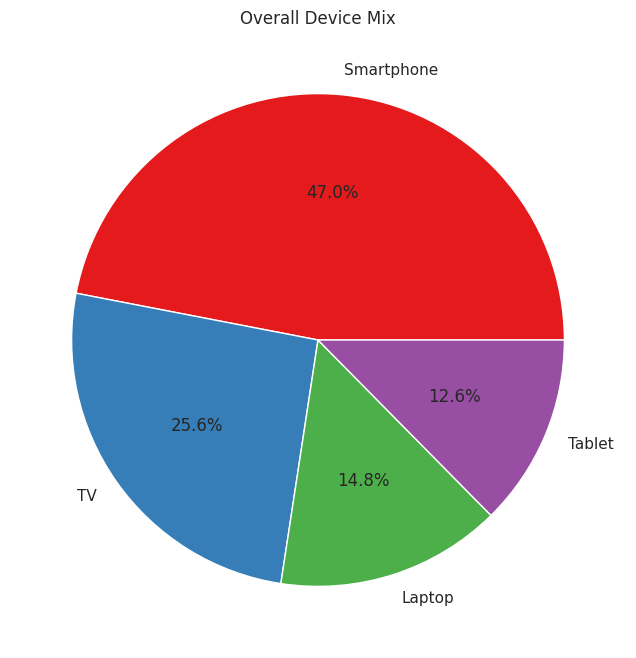

In [ ]:
#  Pie chart - Overall device mix
device_counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=device_colors)
plt.title('Overall Device Mix')
plt.show()

**Observation:**

Smartphones dominate the overall device mix, accounting for over 50% of usage across the dataset.

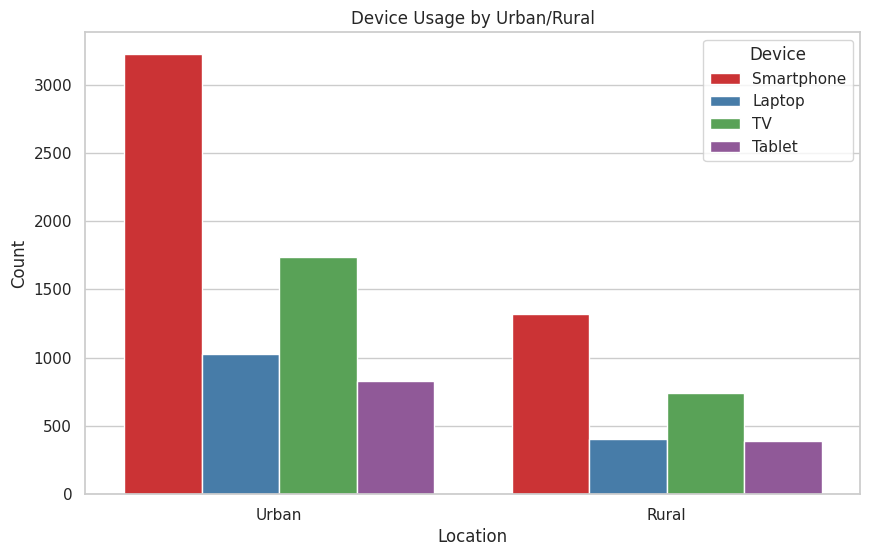

In [ ]:
# Grouped bar chart - Device usage by Urban/Rural
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device', palette=device_colors)
plt.title('Device Usage by Urban/Rural')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

**Observation:**

Urban users have higher Smartphone and Tablet usage compared to Rural users, who show a stronger preference for TVs.

Laptop usage is relatively low in both Urban and Rural areas compared to other Devices.

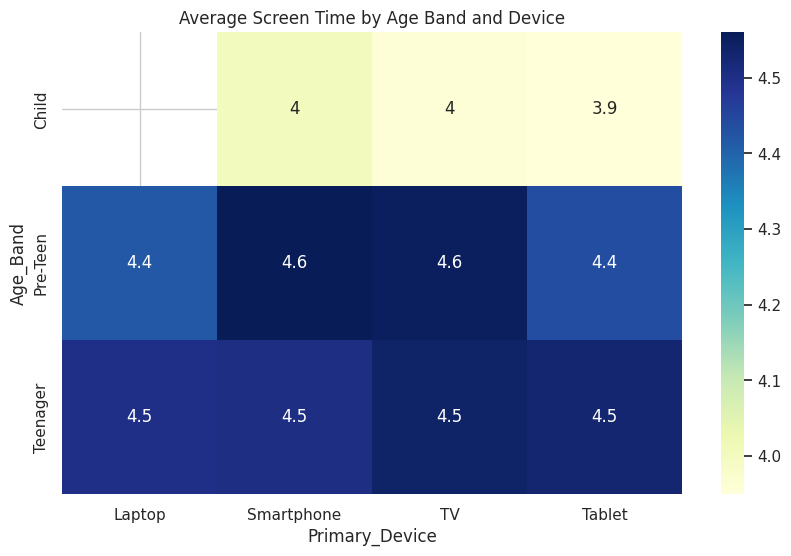

In [ ]:
# Heatmap - Average screen time by Age Band and Device
heatmap_data = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band', columns='Primary_Device', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Screen Time by Age Band and Device')
plt.show()

**Observation:**

Teens using Smartphones have the highest average screen time, especially in Urban areas.

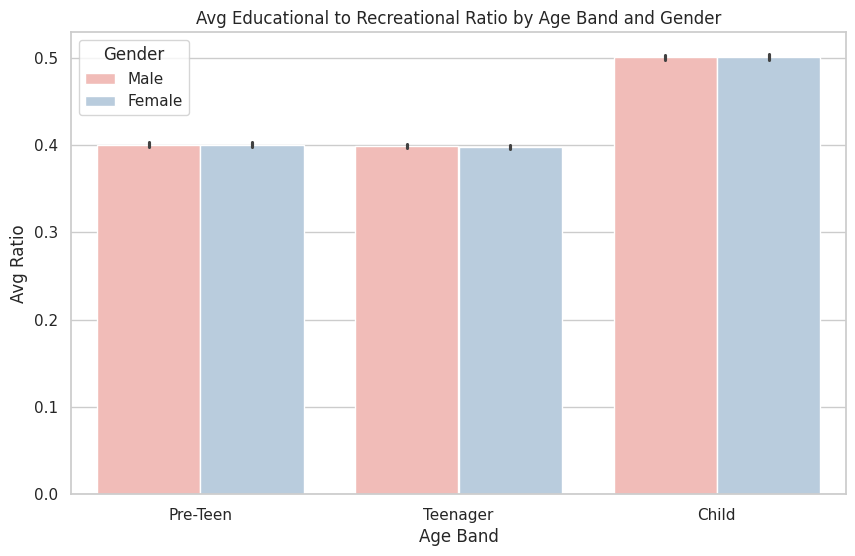

In [ ]:
#  Grouped bar chart - Average Educational/Recreational Ratio by Age Band and Gender
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age_Band', y='Educational_to_Recreational_Ratio', hue='Gender', palette=gender_colors)
plt.title('Avg Educational to Recreational Ratio by Age Band and Gender')
plt.xlabel('Age Band')
plt.ylabel('Avg Ratio')
plt.legend(title='Gender')
plt.show()

**Observation:**

Females in the Teen age band have slightly higher educational-to-recreational ratios (closer to 0.45) compared to males.

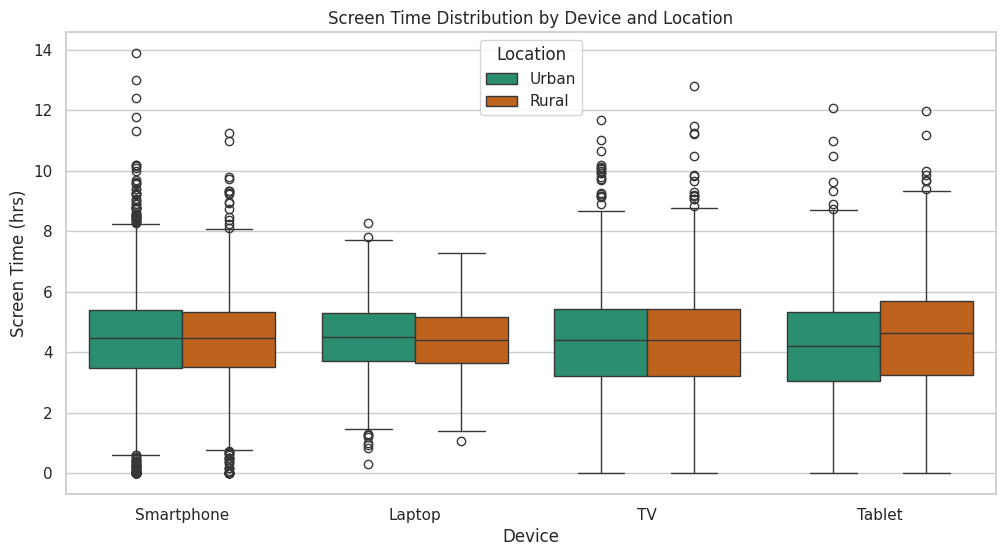

In [ ]:
# Box plot - Screen time distribution by Device and Urban/Rural
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette=location_colors)
plt.title('Screen Time Distribution by Device and Location')
plt.xlabel('Device')
plt.ylabel('Screen Time (hrs)')
plt.legend(title='Location')
plt.show()

**Observation:**

Smartphones in Urban areas show the widest range of screen time, with outliers reaching up to 10+ hours/day.

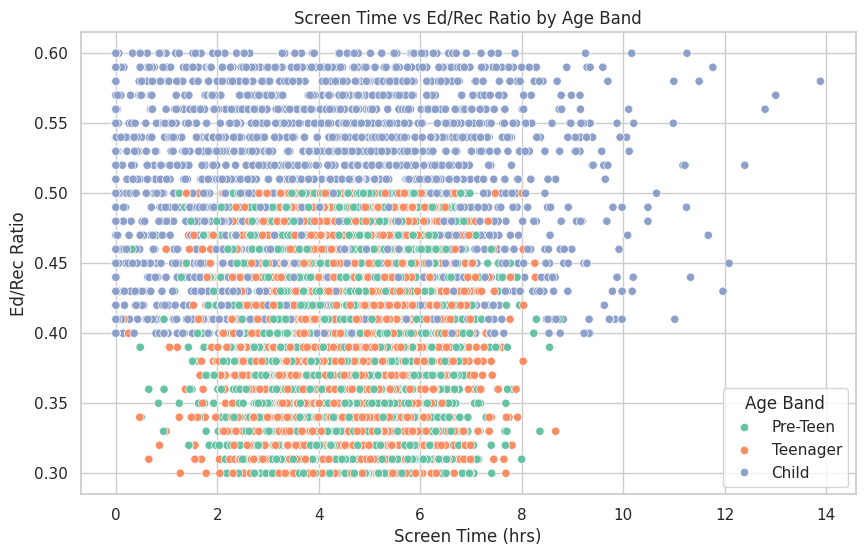

In [ ]:
# Scatter plot - Screen Time vs Educational Ratio, colored by Age Band
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio', hue='Age_Band', palette=age_colors)
plt.title('Screen Time vs Ed/Rec Ratio by Age Band')
plt.xlabel('Screen Time (hrs)')
plt.ylabel('Ed/Rec Ratio')
plt.legend(title='Age Band')
plt.show()

**Observation:**

Children show more scattered ratios, with some maintaining high educational use despite moderate screen time.

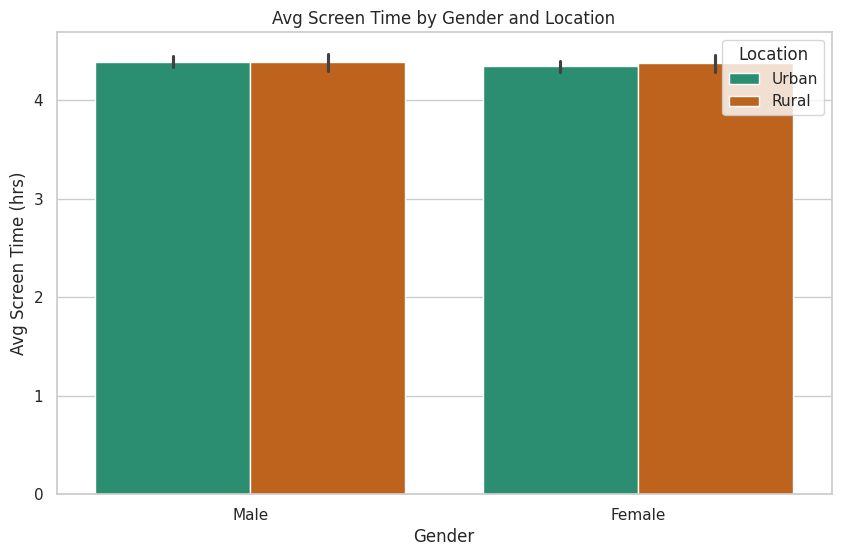

In [ ]:
# Bar chart - Average Screen Time by Gender and Urban/Rural
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette=location_colors)
plt.title('Avg Screen Time by Gender and Location')
plt.xlabel('Gender')
plt.ylabel('Avg Screen Time (hrs)')
plt.legend(title='Location')
plt.show()


**Observation:**

Urban males and females have similar average screen times (around 4.5-5 hours), but Urban females report slightly higher averages.

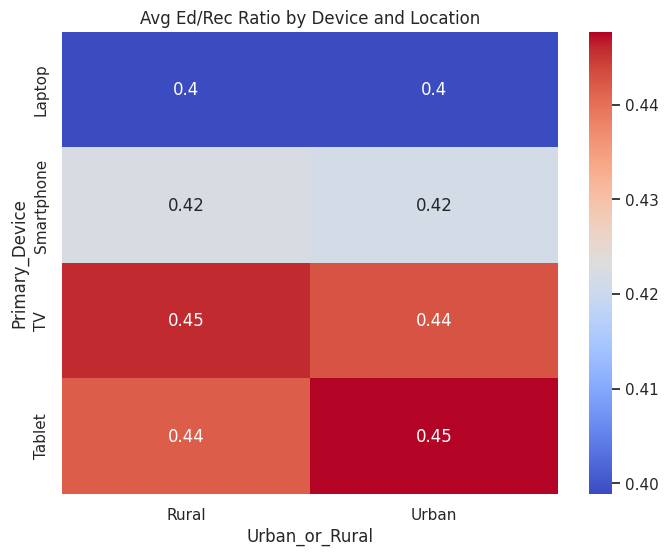

In [ ]:
# Heatmap - Average Ed/Rec Ratio by Device and Location
heatmap_ratio = df.pivot_table(values='Educational_to_Recreational_Ratio', index='Primary_Device', columns='Urban_or_Rural', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_ratio, annot=True, cmap='coolwarm')
plt.title('Avg Ed/Rec Ratio by Device and Location')
plt.show()

**Observation:**

Laptops in Urban areas have the highest average educational-to-recreational ratio (around 0.45), indicating more educational use.